In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_raw = pd.read_csv('activities_12_28_2024.csv')

In [4]:
# select relevant columns and rename for convenience
df_runs = df_raw[['Activity Date','Activity Name','Activity Type','Activity Description',
                  'Elapsed Time','Moving Time','Distance','Elevation Gain','Elevation Loss']]
df_runs = df_runs.rename(columns = {'Activity Date':'Date', 'Activity Name':'Name',
                                    'Activity Type':'Type','Activity Description':'Description'})
df_runs

,Date,Name,Type,Description,Elapsed Time,Moving Time,Distance,Elevation Gain,Elevation Loss
0,"Jun 8, 2021, 10:57:53 PM",Evening Run,Run,NaN,2999,1805,5.35,138.346207,138.345993
1,"Jun 10, 2021, 11:27:28 PM",Evening Run,Run,NaN,1959,1917,4.88,115.467758,128.367996
2,"Jun 11, 2021, 10:03:23 PM",Evening Run,Run,NaN,1088,1073,3.22,81.699196,81.599197
3,"Jun 12, 2021, 12:33:07 PM",Morning Run,Run,NaN,517,517,1.69,48.912777,49.012798
4,"Jun 16, 2021, 1:08:01 AM",Evening Run,Run,NaN,1187,1007,1.71,0.000000,0.100000
...,...,...,...,...,...,...,...,...,...
366,"Mar 9, 2024, 4:24:34 PM",Afternoon Run,Run,Five guys,788077,357,0.97,0.000000,0.000000
367,"Jul 3, 2024, 12:34:40 PM",Morning Run,Run,NaN,1889,1540,4.86,13.916079,23.094755
368,"Nov 13, 2024, 11:00:00 PM",Evening Run,Run,treadmill run,2056,2056,6.43,0.000000,NaN
369,"Nov 15, 2024, 1:01:26 PM",Morning Run,Run,paused watch for 0.5,5181,1763,5.75,44.248997,57.565666


In [33]:
# fix units in each column and add pace 
df_runs['Distance'] = df_runs['Distance'] * 0.621 # km to miles
df_runs['Elapsed Time'] = df_runs['Elapsed Time'] / 60 # seconds to mins
df_runs['Moving Time'] = df_runs['Moving Time'] / 60 # seconds to mins
df_runs['Pace'] = df_runs['Moving Time'] / df_runs['Distance'] # min/mile
df_runs['Elevation Gain'] = df_runs['Elevation Gain'] * 3.28
df_runs

# remove outliers: where pace is > 16?

,Date,Name,Type,Description,Elapsed Time,Moving Time,Distance,Elevation Gain,Elevation Loss,Pace
0,"Jun 8, 2021, 10:57:53 PM",Evening Run,Run,NaN,0.833056,0.501389,2.063179,453.775558,138.345993,0.243018
1,"Jun 10, 2021, 11:27:28 PM",Evening Run,Run,NaN,0.544167,0.532500,1.881928,378.734247,128.367996,0.282954
2,"Jun 11, 2021, 10:03:23 PM",Evening Run,Run,NaN,0.302222,0.298056,1.241764,267.973362,81.599197,0.240026
3,"Jun 12, 2021, 12:33:07 PM",Morning Run,Run,NaN,0.143611,0.143611,0.651733,160.433908,49.012798,0.220353
4,"Jun 16, 2021, 1:08:01 AM",Evening Run,Run,NaN,0.329722,0.279722,0.659446,0.000000,0.100000,0.424178
...,...,...,...,...,...,...,...,...,...,...
366,"Mar 9, 2024, 4:24:34 PM",Afternoon Run,Run,Five guys,218.910278,0.099167,0.374072,0.000000,0.000000,0.265101
367,"Jul 3, 2024, 12:34:40 PM",Morning Run,Run,NaN,0.524722,0.427778,1.874215,45.644738,23.094755,0.228244
368,"Nov 13, 2024, 11:00:00 PM",Evening Run,Run,treadmill run,0.571111,0.571111,2.479672,0.000000,NaN,0.230317
369,"Nov 15, 2024, 1:01:26 PM",Morning Run,Run,paused watch for 0.5,1.439167,0.489722,2.217436,145.136709,57.565666,0.220851


In [6]:
# month, year columns
df_dates = df_runs.copy()

month_arr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_dates['Year'] = df_dates['Date'].apply(
    lambda x: 2021 if '2021' in x else
              2022 if '2022' in x else
              2023 if '2023' in x else
              2024 if '2024' in x else None
)

# alternatively, using numpy:
# import numpy as np

# conditions = [
#     df_dates['Date'].str.contains('2021'),
#     df_dates['Date'].str.contains('2022'),
#     df_dates['Date'].str.contains('2023'),
#     df_dates['Date'].str.contains('2024')
# ]
# years = [2021, 2022, 2023, 2024]

# df['Year'] = np.select(conditions, years, default=None)

def find_month(x):
    for month in month_arr:
        if month in x:
            return month
    return None

df_dates['Month'] = df_dates['Date'].apply(find_month)

cols = ['Date', 'Year', 'Month'] + [col for col in df_dates.columns if col not in ['Date', 'Year', 'Month']]
df_dates = df_dates[cols]
df_dates

,Date,Year,Month,Name,Type,Description,Elapsed Time,Moving Time,Distance,Elevation Gain,Elevation Loss,Pace
0,"Jun 8, 2021, 10:57:53 PM",2021,Jun,Evening Run,Run,NaN,49.983333,30.083333,3.32235,138.346207,138.345993,9.054836
1,"Jun 10, 2021, 11:27:28 PM",2021,Jun,Evening Run,Run,NaN,32.650000,31.950000,3.03048,115.467758,128.367996,10.542884
2,"Jun 11, 2021, 10:03:23 PM",2021,Jun,Evening Run,Run,NaN,18.133333,17.883333,1.99962,81.699196,81.599197,8.943366
3,"Jun 12, 2021, 12:33:07 PM",2021,Jun,Morning Run,Run,NaN,8.616667,8.616667,1.04949,48.912777,49.012798,8.210337
4,"Jun 16, 2021, 1:08:01 AM",2021,Jun,Evening Run,Run,NaN,19.783333,16.783333,1.06191,0.000000,0.100000,15.804855
...,...,...,...,...,...,...,...,...,...,...,...,...
366,"Mar 9, 2024, 4:24:34 PM",2024,Mar,Afternoon Run,Run,Five guys,13134.616667,5.950000,0.60237,0.000000,0.000000,9.877650
367,"Jul 3, 2024, 12:34:40 PM",2024,Jul,Morning Run,Run,NaN,31.483333,25.666667,3.01806,13.916079,23.094755,8.504359
368,"Nov 13, 2024, 11:00:00 PM",2024,Nov,Evening Run,Run,treadmill run,34.266667,34.266667,3.99303,0.000000,NaN,8.581620
369,"Nov 15, 2024, 1:01:26 PM",2024,Nov,Morning Run,Run,paused watch for 0.5,86.350000,29.383333,3.57075,44.248997,57.565666,8.228897


In [ ]:
# summarized table:
total_summary = df_runs[['Distance','Moving Time','Elevation Gain']].agg(['sum']) # summing columns, TO-DO: ignore N/A values in elevation
total_summary['Activities'] = len(df_runs) # adding activities column as the total number of rows
total_summary = total_summary[['Activities','Distance','Moving Time','Elevation Gain']] # rearrange columns
total_summary['Moving Time'] = total_summary['Moving Time'] / 60
total_summary = total_summary.round(2)
total_summary = total_summary.rename(columns = {'Distance': 'Distance (mi)', 'Moving Time': 'Moving Time (hr)', 'Elevation Gain': 'Elevation Gain (ft)'})

total_summary

,Activities,Distance,Moving Time,Elevation Gain
sum,371,1412.74,204.06,23640.55


In [34]:
# yearly summary table:
yearly_summary = df_dates.groupby('Year').agg({
    'Distance': 'sum',
    'Moving Time': 'sum',
    'Elevation Gain': 'sum'
})

yearly_summary['Activities'] = df_dates.groupby('Year').size()
yearly_summary = yearly_summary[['Activities', 'Distance', 'Moving Time', 'Elevation Gain']]
yearly_summary['Moving Time'] = yearly_summary['Moving Time'] / 60
yearly_summary = yearly_summary.reset_index()
yearly_summary = yearly_summary.round(2)
yearly_summary = yearly_summary.rename(columns = {'Distance': 'Distance (mi)', 'Moving Time': 'Moving Time (hr)', 'Elevation Gain': 'Elevation Gain (ft)'})
yearly_summary

,Year,Activities,Distance (mi),Moving Time (hr),Elevation Gain (ft)
0,2021,139,542.65,81.87,11584.62
1,2022,115,349.38,46.64,5129.34
2,2023,110,505.10,73.30,6811.88
3,2024,7,15.61,2.25,114.71


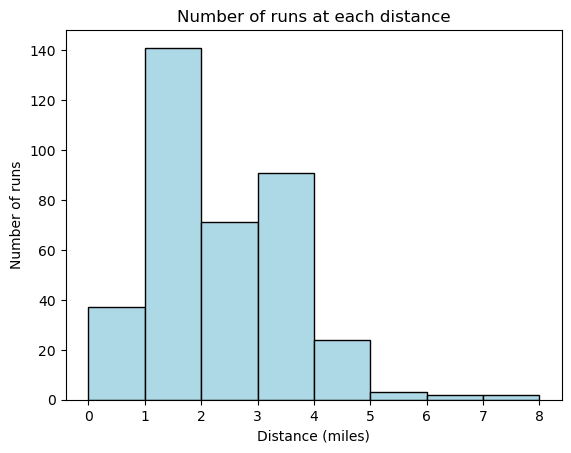

In [46]:
# graph: number of runs at each distance

# from IPython.core.display import HTML
# HTML("<link href='https://fonts.googleapis.com/css2?family=Inter:ital,opsz,wght@0,14..32,100..900;1,14..32,100..900&family=Outfit:wght@100..900&display=swap' rel='stylesheet'>")

# ---- MATPLOTLIB ----
dist_hist, dist_hist_ax = plt.subplots()

dist_hist_ax.hist(df_runs['Distance'], 
        bins = range(int(df_runs['Distance'].min()), int(df_runs['Distance'].max()) + 2), 
        color = 'lightblue', 
        edgecolor = 'black')

dist_hist_ax.set_xlabel('Distance (miles)')
dist_hist_ax.set_ylabel('Number of runs')
dist_hist_ax.set_title('Number of runs at each distance')

plt.show()
plt.close(dist_hist)

# ---- PLOTLY ----
dist_hist = px.histogram(df_dates, 
        x = "Distance", 
        title = "Number of Runs at Each Distance", 
        nbins = 12, 
        template = 'seaborn',
        labels = {'Distance': 'Distance (miles)', 'count' : 'Number of runs'})
# dist_hist.update_layout(title_font = {'family': 'Inter'}, font = {'family': 'Outfit'})
dist_hist.update_traces(marker_line_width = 1, marker_line_color = 'black')
dist_hist.show()

In [16]:
# graph: pace pie chart

# make new column for distance class
df_dates['Distance Bracket'] = df_dates['Distance'].apply(
    lambda x: '<2' if x < 2 else
              '2-4' if x <= 4 else 
              '4-6' if x <= 6 else
              '6-8' if x <= 8 else
              '>8'
)

# ---- MATPLOTLIB ----
# dist_pie, dist_pie = plt.subplots()
# counting: dist_count = df_runs['Class'].value_counts().sort_index()
# dist_pie.pie(dist_count, label = df_runs['Class'])

# ---- PLOTLY ----
bracket_counts = df_dates['Distance Bracket'].value_counts().sort_index()

dist_pie = px.pie(
    names = bracket_counts.index,
    values = bracket_counts.values,
    title = 'Mileage Distribution',
    template = 'seaborn'
)
dist_pie.update_traces(legendgrouptitle_text = 'Distance Bracket (miles)')

dist_pie.show()

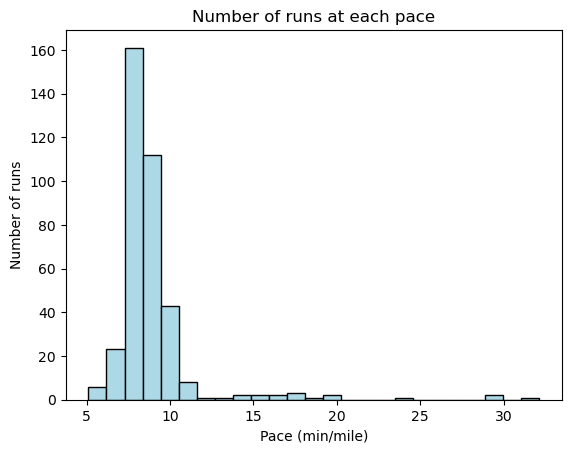

In [22]:
# graph: pace histogram

# ---- MATPLOTLIB ----
pace_hist, pace_hist_ax = plt.subplots()

pace_hist_ax.hist(df_runs['Pace'],
                  bins = 25,
                  color = 'lightblue',
                  edgecolor = 'black')
pace_hist_ax.set_xlabel('Pace (min/mile)')
pace_hist_ax.set_ylabel('Number of runs')
pace_hist_ax.set_title('Number of runs at each pace')

# ---- PLOTLY ----
pace_hist = px.histogram(df_dates, 
    x = "Pace", 
    title = "Number of Runs at Each Pace", 
    template = "seaborn",
    labels = {'Pace': 'Pace (min/mile)'})
pace_hist.update_traces(marker_line_width = 1, marker_line_color = 'black')
pace_hist.show()

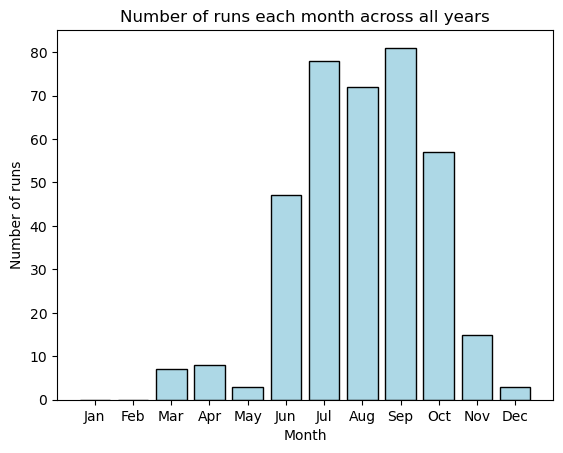

In [24]:
# graph: number of runs in each month

# ---- MATPLOTLIB ----
monthly_counts = df_dates['Month'].value_counts().sort_index()

bar_month, bar_month_ax = plt.subplots()
bar_month_ax.bar(monthly_counts.index, 
                 monthly_counts.values, 
                 color = 'lightblue', 
                 edgecolor = 'black')

bar_month_ax.set_xlabel('Month')
bar_month_ax.set_ylabel('Number of runs')
bar_month_ax.set_title('Number of runs each month across all years')

# ---- PLOTLY ----
df_dates['Month'] = pd.Categorical(df_dates['Month'], categories = month_arr, ordered=True)

month_hist = px.histogram(
        df_dates,
        x = 'Month',
        nbins = 12,
        labels = {'Month': 'Month', 'count': 'Number of runs'},
        title = 'Number of Runs by Month',
        template = 'seaborn'
    )
month_hist.update_traces(marker_line_width = 1, marker_line_color = 'black')
month_hist.update_xaxes(categoryorder = 'array', categoryarray = month_arr)
month_hist.show()

In [ ]:
# adding month and year columns to df_dates df
# df_runs['Year'] = df_runs['Year'].str.contains("2021")

df_2021 = df_dates[df_dates['Date'].str.contains("2021")]
df_2022= df_dates[df_dates['Date'].str.contains("2022")]
df_2023 = df_dates[df_dates['Date'].str.contains("2023")]
df_2024 = df_dates[df_dates['Date'].str.contains("2024")]

# to-do: create yearly summaries



,Date,Year,Month,Name,Type,Description,Elapsed Time,Moving Time,Distance,Elevation Gain,Elevation Loss,Pace
0,"Jun 8, 2021, 10:57:53 PM",2021,Jun,Evening Run,Run,NaN,49.983333,30.083333,3.32235,138.346207,138.345993,9.054836
1,"Jun 10, 2021, 11:27:28 PM",2021,Jun,Evening Run,Run,NaN,32.650000,31.950000,3.03048,115.467758,128.367996,10.542884
2,"Jun 11, 2021, 10:03:23 PM",2021,Jun,Evening Run,Run,NaN,18.133333,17.883333,1.99962,81.699196,81.599197,8.943366
3,"Jun 12, 2021, 12:33:07 PM",2021,Jun,Morning Run,Run,NaN,8.616667,8.616667,1.04949,48.912777,49.012798,8.210337
4,"Jun 16, 2021, 1:08:01 AM",2021,Jun,Evening Run,Run,NaN,19.783333,16.783333,1.06191,0.000000,0.100000,15.804855
...,...,...,...,...,...,...,...,...,...,...,...,...
134,"Nov 6, 2021, 1:10:07 PM",2021,Nov,VG Boring,Run,NaN,48.633333,47.616667,6.07959,103.411903,101.811997,7.832217
135,"Nov 8, 2021, 9:10:46 PM",2021,Nov,Afternoon Run,Run,NaN,36.500000,34.066667,4.07376,48.577778,36.977779,8.362463
136,"Nov 9, 2021, 9:02:47 PM",2021,Nov,Sweet Briar Workout,Run,4x1000,56.216667,46.900000,6.15411,89.128418,89.728401,7.620923
137,"Nov 10, 2021, 9:24:15 PM",2021,Nov,Afternoon Run,Run,Left foot hurts when I put weight on it,43.066667,39.983333,4.99905,72.631348,68.231300,7.998186
